In [4]:
# Import necessary libraries
import os
import sys
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from get_mel_spectrogram import get_mel_spectrogram

In [5]:
# File path
file_dir = '.\\data\\source\\6_dB_pump\\pump\\id_00\\normal\\'
file_name = '00000156.wav'
file_path = os.path.join(file_dir, file_name)

In [6]:
# Load the audio file 
signal, fs = librosa.load(file_path, sr=None, mono=False)
signal = signal[0, :]
print(f"File duration: {librosa.get_duration(filename=file_path)} s, fs={fs} Hz")

File duration: 10.0 s, fs=16000 Hz


C:\Users\ecebo\anaconda3\envs\audio_malfunction_detection\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


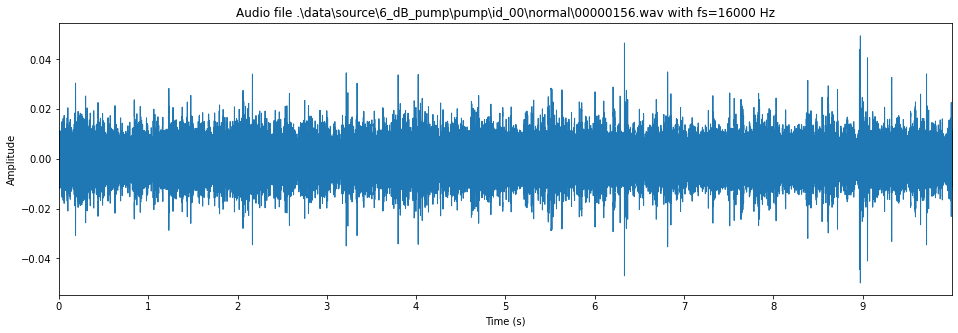

In [7]:
# Plot the signal
plt.figure(figsize=(16,5))
plt.subplot(111)
librosa.display.waveplot(signal, sr=fs)
plt.title(f"Audio file {file_path} with fs={fs} Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [8]:
np.mean(signal)
np.std(signal)


0.0052915676

In [ ]:
# Plot multiple signals
signal_multi_ch, sr = librosa.load(file_path, sr=None, mono=False)
fig = make_subplots(rows=4, cols=2)
for no_sig in range(signal_multi_ch.shape[0]):
    fig.add_trace(
    go.Scatter(y=signal_multi_ch[no_sig, :]),
    row=no_sig%4+1, col=(no_sig)//4+1)
fig.show()

In [ ]:
# Compute and plot the FFT
sig_fft = np.fft.fft(signal, n=1024)
freq = np.linspace(0, fs, len(sig_fft))

sig_fft_left = sig_fft[:len(freq)//2]
freq_left = freq[:len(freq)//2]

fig = px.line(x=freq_left, y=abs(sig_fft_left))
fig.update_layout(title="FFT of the signal",
        yaxis_title="abs(fft)",
        xaxis_title="Frequency (Hz)")

In [ ]:
# Compute and plot the FFT for multiple signals
fig = go.Figure()
for no_sig in range(signal_multi_ch.shape[0]):
    
    sig_fft = np.fft.fft(signal_multi_ch[no_sig, :], n=256)
    freq = np.linspace(0, fs, len(sig_fft))

    sig_fft_left = sig_fft[:len(freq)//2]
    freq_left = freq[:len(freq)//2]
    
    fig.add_trace(
    go.Scatter(x=freq_left, y=abs(sig_fft_left))
    )

fig.update_layout(title="FFT of all channels",
                  yaxis_title="abs(fft)",
                  xaxis_title="Frequency (Hz)")


fig.show()

In [12]:
help(librosa.filters.mel)

Help on function mel in module librosa.filters:

mel(sr, n_fft, n_mels=128, fmin=0.0, fmax=None, htk=False, norm='slaney', dtype=<class 'numpy.float32'>)
    Create a Mel filter-bank.
    
    This produces a linear transformation matrix to project
    FFT bins onto Mel-frequency bins.
    
    Parameters
    ----------
    sr        : number > 0 [scalar]
        sampling rate of the incoming signal
    
    n_fft     : int > 0 [scalar]
        number of FFT components
    
    n_mels    : int > 0 [scalar]
        number of Mel bands to generate
    
    fmin      : float >= 0 [scalar]
        lowest frequency (in Hz)
    
    fmax      : float >= 0 [scalar]
        highest frequency (in Hz).
        If `None`, use ``fmax = sr / 2.0``
    
    htk       : bool [scalar]
        use HTK formula instead of Slaney
    
    norm : {None, 'slaney', or number} [scalar]
        If 'slaney', divide the triangular mel weights by the width of the mel band
        (area normalization).
    
      

(64, 513)


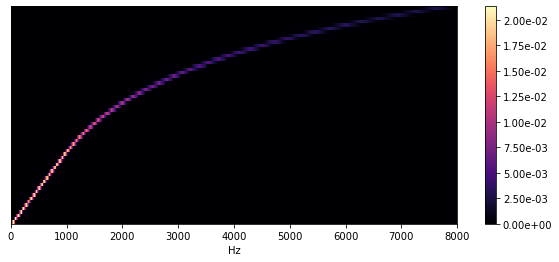

In [34]:
# Mel filter banks
n_fft = 1024
n_mels = 64
filter_banks = librosa.filters.mel(n_fft=params['n_fft'], sr=fs, n_mels=params['n_mels'])
print(filter_banks.shape)

plt.figure(figsize=(10,4))
librosa.display.specshow(filter_banks, sr=fs, x_axis='linear')
plt.colorbar(format="%.2e")
plt.show()

In [21]:
params['n_fft']

1024

{'window': 0.064, 'window_length': 1024, 'overlap': 0.5, 'overlap_length': 512, 'hop_length': 512, 'n_fft': 1024, 'n_mels': 64}
Size of mel_spect: (64, 313), total number of points: 20032


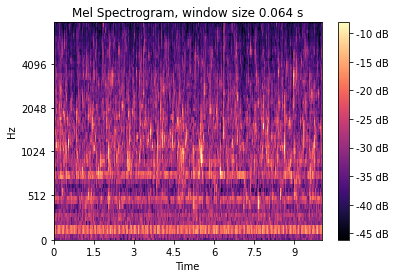

In [15]:
# Compute and plot mel spectogram
window = 1024/fs # 2
n_mels = 64
mel_spect, mel_spect_db, mfcc, params = get_mel_spectrogram(file_path, window=window, overlap=0.5, n_mels=n_mels, machine='pump') 

print(params)

print(f"Size of mel_spect: {mel_spect.shape}, total number of points: {mel_spect.size}")
librosa.display.specshow(mel_spect_db, sr=fs, hop_length=params['overlap_length'], x_axis='time', y_axis='mel');
# times = librosa.times_like(mel_spect, sr=fs, hop_length=params['overlap_length'])
# librosa.display.specshow(mel_spect_db, sr=fs, hop_length=params['overlap_length'], x_coords = times, y_axis='mel');

plt.title(f"Mel Spectrogram, window size {params['window']} s");
plt.colorbar(format='%+2.0f dB');

(64, 513)


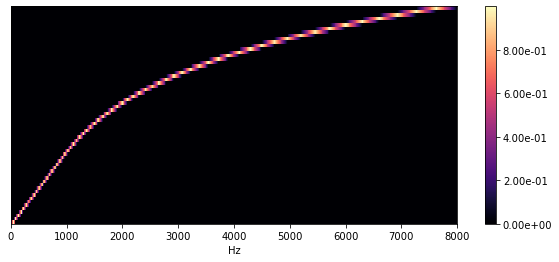

In [42]:
# Mel filter banks
filter_banks = librosa.filters.mel(sr=fs, n_fft=params['n_fft'], n_mels=params['n_mels'], norm=None)
print(filter_banks.shape)

plt.figure(figsize=(10,4))
librosa.display.specshow(filter_banks, sr=fs, x_axis='linear')
plt.colorbar(format="%.2e")
plt.show()

In [29]:
freq_axis = np.linspace(0, 8000, params['n_fft']//2+1)
freq_axis.shape

(513,)

In [39]:
freq_axis[np.argmax(filter_banks, axis=1)].shape

(64,)

In [12]:
n_frames = 5
dims = n_mels * n_frames
vectorarray_size = len(mel_spect_db[0, :]) - n_frames + 1

print("vectorarray_size:", vectorarray_size)

vectorarray = np.zeros((vectorarray_size, dims), float)
print("vectorarray: ", vectorarray.shape)

for t in range(n_frames):
    print(t, t + vectorarray_size)
    print(n_mels*t, n_mels*(t + 1))
    print("\n")
    vectorarray[:, n_mels*t : n_mels*(t + 1)] = mel_spect_db[:, t: t + vectorarray_size].T


vectorarray.shape

vectorarray_size: 309
vectorarray:  (309, 320)
0 309
0 64


1 310
64 128


2 311
128 192


3 312
192 256


4 313
256 320




(309, 320)

In [ ]:
librosa.display.specshow(vectorarray)

In [14]:
help(librosa.feature.mfcc)

Help on function mfcc in module librosa.feature.spectral:

mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
    Mel-frequency cepstral coefficients (MFCCs)
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)] or None
        audio time series
    
    sr : number > 0 [scalar]
        sampling rate of ``y``
    
    S : np.ndarray [shape=(d, t)] or None
        log-power Mel spectrogram
    
    n_mfcc: int > 0 [scalar]
        number of MFCCs to return
    
    dct_type : {1, 2, 3}
        Discrete cosine transform (DCT) type.
        By default, DCT type-2 is used.
    
    norm : None or 'ortho'
        If ``dct_type`` is `2 or 3`, setting ``norm='ortho'`` uses an ortho-normal
        DCT basis.
    
        Normalization is not supported for ``dct_type=1``.
    
    lifter : number >= 0
        If ``lifter>0``, apply *liftering* (cepstral filtering) to the MFCCs::
    
            M[n, :] <- M[n, :] * (1 + sin(pi * (n + 1) / lifte

In [15]:
librosa.display.specshow(mfcc-mfcc_2, sr=fs, hop_length=params['overlap_length'], x_axis='time', y_axis='mel')
np.linalg.norm(mfcc-mfcc_2)/np.linalg.norm(mfcc)

NameError: name 'mfcc_2' is not defined

In [56]:
def get_mel_spectrogram(file_path, window, overlap=None, n_fft=None, n_mels=32, fmin=0, fmax=None, no_channel=None, machine=None):
    
    # Load the signal
    signal, fs = librosa.load(file_path, sr=None, mono=False)
    
    # Default channel no selected based on machine
    channel_dict = {'pump': 3, 'valve': 1, 'slider': 7, 'fan': 5}
    if no_channel == None:
        if machine == None:
            signal = signal.mean(axis=0)
        else:
            no_channel = channel_dict[machine]-1
            signal = signal[no_channel, :]
    else:
        signal = signal[no_channel, :]
    
    # Window length in samples
    window_length = int(window*fs)
    
    # Default overlap is 50% of the window size
    if overlap==None:
        overlap = 0.5
    
    # Overlap in samples
    overlap_length = int(window_length*overlap)
    
    # Hop length in samples
    hop_length = window_length-overlap_length
    
    # Default n_fft is the smallest power of 2 larger than win_length
    if n_fft==None:
        n_fft = int(2**np.ceil(np.log2(window_length)))
    
    # Default min frequency is zero
    fmin = 0
    # Default max frequency is half of the sampling frequency
    fmax = fs/2
    
    # Compute mel spectogram
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=fs, 
                                               win_length=window_length, 
                                               hop_length=hop_length,
                                               n_fft=n_fft,
                                               n_mels=n_mels,
                                               fmin=fmin,
                                               fmax=fmax)
    # Mel spectogram in decibels
    mel_spect_db = librosa.power_to_db(mel_spect, ref=1.0, amin=sys.float_info.epsilon, top_db=np.inf)

    # MFCC
    mfcc = librosa.feature.mfcc(y=signal, sr=fs, n_mfcc=n_mels,
                                win_length=window_length, 
                                hop_length=hop_length,
                                n_fft=n_fft,
                                fmin=fmin,
                                fmax=fmax)
    
    # Centers of mel filter bands
    filter_banks = librosa.filters.mel(sr=fs, n_fft=n_fft, n_mels=n_mels)
    freq_axis = np.linspace(fmin, fmax, n_fft//2+1)
    mel_center_freq = freq_axis[np.argmax(filter_banks, axis=1)]
    
    params = {}
    params['window'] = window
    params['window_length'] = window_length
    params['overlap'] = overlap
    params['overlap_length'] = overlap_length
    params['hop_length'] = hop_length
    params['n_fft'] = n_fft
    params['n_mels'] = n_mels
    params['fmin'] = fmin
    params['fmax'] = fmax
    params['mel_center_freq'] = mel_center_freq
    
    return mel_spect, mel_spect_db, mfcc, params

(32, 40)
(32, 40)


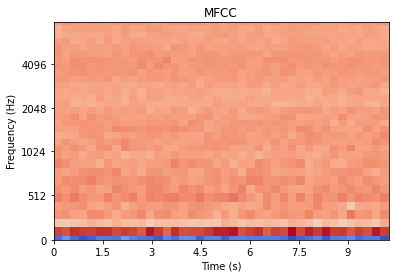

In [57]:
window = 1024/fs * 8
n_mels = 32
mel_spect, mel_spect_db, mfcc, params = get_mel_spectrogram(file_path, window=window, overlap=0.5, n_mels=n_mels, machine='pump') 

window_length = params['window_length']
n_fft = params['n_fft']
hop_length = params['hop_length']

mfcc_2 = librosa.feature.mfcc(signal, sr=fs,
                            win_length=window_length, 
                            hop_length=hop_length,
                            n_fft=n_fft,
                            n_mfcc=n_mels
                            )
print(mfcc.shape)
print(mfcc_2.shape)

librosa.display.specshow(mfcc, sr=fs, hop_length=params['overlap_length'], x_axis='time', y_axis='mel')
plt.title("MFCC")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

In [ ]:
def extract_features(file_path):    
    audio, sample_rate = librosa.load(file_path) 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_mfcc=64)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs, mfccs_processed

mfccs, mfccs_processed = extract_features(file_path)

mfccs.shape

In [ ]:
mfccs_processed.shape